### ДЗ к уроку 2 Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [4]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

In [5]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [6]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [9]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

In [10]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [11]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [12]:
X_st = X.copy().astype(np.float64)

In [13]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

In [14]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [16]:
X_st[:,3] = custom_StandardScaler(X[:,3])

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 105.82729961503324, веса: [49.50919138  4.25226568  4.36605366  2.96561808]
# итерация: 200, MSE: 41.765536206389996, веса: [56.35352447  4.57531845  3.8942851   3.16449231]
# итерация: 300, MSE: 40.388826905370635, веса: [57.26121688  4.83239797  3.48799943  3.31927537]
# итерация: 400, MSE: 40.190257077489576, веса: [57.38159464  5.04657177  3.1485977   3.44904188]
# итерация: 500, MSE: 40.0651770631049, веса: [57.39755909  5.22507171  2.86510938  3.55782242]
# итерация: 600, MSE: 39.97818719230206, веса: [57.39967629  5.37386821  2.62832788  3.64897604]
# итерация: 700, MSE: 39.91752790346481, веса: [57.39995707  5.4979255   2.43056129  3.72533282]
# итерация: 800, MSE: 39.87522624498369, веса: [57.39999431  5.60137291  2.26538363  3.789275  ]
# итерация: 900, MSE: 39.84572636337411, веса: [57.39999924  5.68764659  2.12742666  3.84280624]
# итерация: 1000, MSE: 39.82515396832278, веса: [57.3999999   5.75960683  2.01220597  3.88761049]


array([57.3999999 ,  5.75960683,  2.01220597,  3.88761049])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 41.04061883527415, веса: [57.39679237  4.86541714  2.71983864  4.09518261]
# итерация: 1000, MSE: 39.56753018831154, веса: [57.39830947  5.6966708   1.95859557  4.03017859]
# итерация: 1500, MSE: 38.853399109026064, веса: [57.39798589  5.97963816  1.64155279  4.0668687 ]
# итерация: 2000, MSE: 38.525705494170765, веса: [57.39786558  6.08124214  1.51092934  4.09708833]
# итерация: 2500, MSE: 38.38252091045614, веса: [57.39781945  6.11925484  1.45744816  4.11307761]
# итерация: 3000, MSE: 38.321821766116315, веса: [57.39780138  6.1338968   1.43563192  4.12047144]
# итерация: 3500, MSE: 38.29654495088949, веса: [57.39779421  6.13964754  1.42675197  4.12369173]
# итерация: 4000, MSE: 38.286129160386295, веса: [57.39779134  6.14193458  1.42314222  4.12505187]
# итерация: 4500, MSE: 38.28186385833358, веса: [57.39779018  6.14285126  1.42167597  4.12561675]
# итерация: 5000, MSE: 38.28012369489933, веса: [57.39778971  6.14322044  1.42108068  4.1258491 ]


array([57.39778971,  6.14322044,  1.42108068,  4.1258491 ])

In [22]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [23]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253416, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406398, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.782405042800356, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617127, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702605, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321603, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.777754760507705, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

##### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока)

In [24]:
lambda_arr = np.logspace(-10, 0, 7)

In [25]:
lambda_arr

array([1.00000000e-10, 4.64158883e-09, 2.15443469e-07, 1.00000000e-05,
       4.64158883e-04, 2.15443469e-02, 1.00000000e+00])

# итерация: 500, MSE: 39.98154848350919, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257860055, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657784594, веса: [57.4         5.99153675  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059616376, веса: [57.4         6.07258433  1.50040895  4.09331596]
# итерация: 2500, MSE: 39.77786771876971, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.7777660553991, веса: [57.4         6.11472089  1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334801314, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.77774657959556, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528818, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035897, веса: [57.4         6.12221275  1.4287921   4.11624295]
# итерация: 500, MS

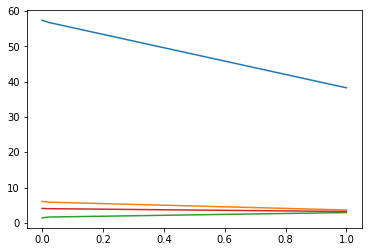

In [26]:
w_arr = []

for lmbd in lambda_arr:
    w = eval_model_reg2(X_st, y, iterations = 5000, alpha=1e-2, lambda_=lmbd)
    w_arr.append(w)
w_arr = np.array(w_arr)

for i in range(len(w_arr[0])):
    plt.plot(lambda_arr, w_arr[:, i])
plt.show()

##### 2. Можно ли к одному и тому же признаку применить сразу, и нормализацию, и стандартизацию?

Это не имеет смысла, так как нормализация приводит все значения к единичной норме ([0;1], а стандартизация сдвигает данные так, что среднее оказывается в 0, а стандартное отклонение == 1. В первом случае данные как-то распределены в интервале от 0 до 1, во втором имеют вид +/- нормального Гауссовского распределения, но интервал значений !=[0;1]

##### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *

In [38]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print (f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W
    

In [41]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-1)

# итерация: 500, MSE: 39.98753873813258, веса: [57.34766765  5.0893263   2.44461657  4.06686007]
# итерация: 1000, MSE: 39.812755948509064, веса: [57.3499999   5.74710458  1.84207396  4.01849149]
# итерация: 1500, MSE: 39.78776053753042, веса: [57.35        5.9717757   1.5907325   4.04823937]
# итерация: 2000, MSE: 39.78379239006283, веса: [57.35        6.05268632  1.48704006  4.07234131]
# итерация: 2500, MSE: 39.78311821878801, веса: [57.35        6.0830318   1.44453381  4.08505533]
# итерация: 3000, MSE: 39.782994056806885, веса: [57.35        6.09474418  1.42717471  4.09093091]
# итерация: 3500, MSE: 39.78296799391679, веса: [57.35        6.0993521   1.42010119  4.09349048]
# итерация: 4000, MSE: 39.782961402683114, веса: [57.35        6.10118731  1.41722267  4.09457219]
# итерация: 4500, MSE: 39.782959381579225, веса: [57.35        6.10192385  1.4160522   4.09502178]
# итерация: 5000, MSE: 39.782958668379464, веса: [57.35        6.10222084  1.41557648  4.09520688]


array([57.35      ,  6.10222084,  1.41557648,  4.09520688])